### 1. Setting specifications

In [1]:
global graph_opts ///
	title(, justification(left) color(black) span pos(11)) ///
	graphregion(color(white) lc(white) la(center)) /// <- remove la(center) for Stata < 15
	ylab(,angle(0) nogrid) xtit(,placement(left) justification(left)) ///
	yscale(noline) xscale(noline) legend(region(lc(none) fc(none)))

### 2. Running ado.file
```chartable``` generates a chart of primary regression results for a variable list, combined with a table detailing those results.

In [2]:
qui do "https://raw.githubusercontent.com/SaoriIwa/Stata-IE-Visual-Library/master/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(from%20two%20data%20dta)/chartable.ado"

### 3. Uploading data1

In [3]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/master/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(from%20two%20data%20dta)/data.dta", clear

### 4. Creating the graph1 and saving the graph

In [4]:
chartable ///
	correct treat_cxr re_3 re_4 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
	[pweight = weight_city] , $graph_opts title("A. Case 1 vs Case 3 in all providers receiving both cases")  rhs(3.case i.city i.type_formal) case0(Case 1 ({it:N} = 407)) case1(Case 3 ({it:N} = 352)) or command(logit)

qui graph save "Fig_4_1.gph" , replace


(0 observations deleted)



### 5. Uploading data2

In [5]:
use "https://github.com/SaoriIwa/Stata-IE-Visual-Library/raw/master/Library/Charts/Chart%20of%20marginal%20effect%20with%20results%20table%20(from%20two%20data%20dta)/data2.dta", clear

### 6. Creating the graph2 and saving the graph

In [6]:
chartable ///
	correct treat_cxr re_3 re_4 treat_refer med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
	, $graph_opts title("B. SP4 with and without sputum report in Mumbai MBBS+") rhs(sp4_spur_1) case0(Ordinary ({it:N} = 51)) case1(Report ({it:N} = 50)) or command(logit)
qui graph save "Fig_4_2.gph" , replace


(0 observations deleted)



### 7. Combining the graphs

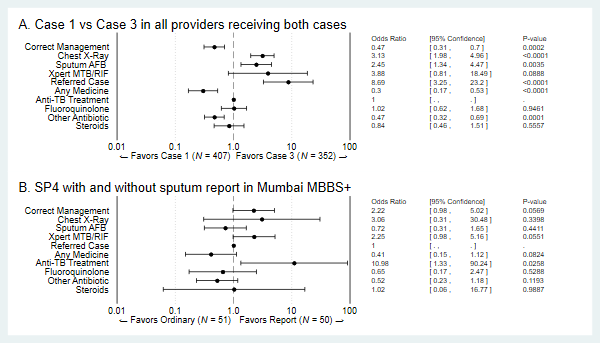

In [7]:
graph combine ///
	"Fig_4_1.gph" ///
	"Fig_4_2.gph" ///
	, $comb_opts xsize(7) c(1)

### 8. Exporting the graph

In [8]:
qui graph export "figure.png" , replace width(2000)